### Apply ML algorithms¶
- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Huperparameter Tuning
- ANN- Artificial Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('C:/Work/air_quality_index/Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


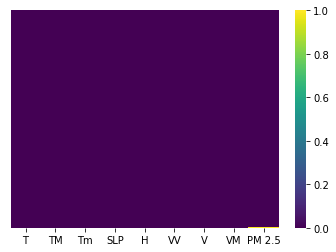

In [4]:
##check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=True, cmap= 'viridis')

In [5]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio
PM 2.5,0.183486


In [6]:
df = df.dropna()

In [7]:
x=df.iloc[:,:-1] #independent feature
y=df.iloc[:,-1]

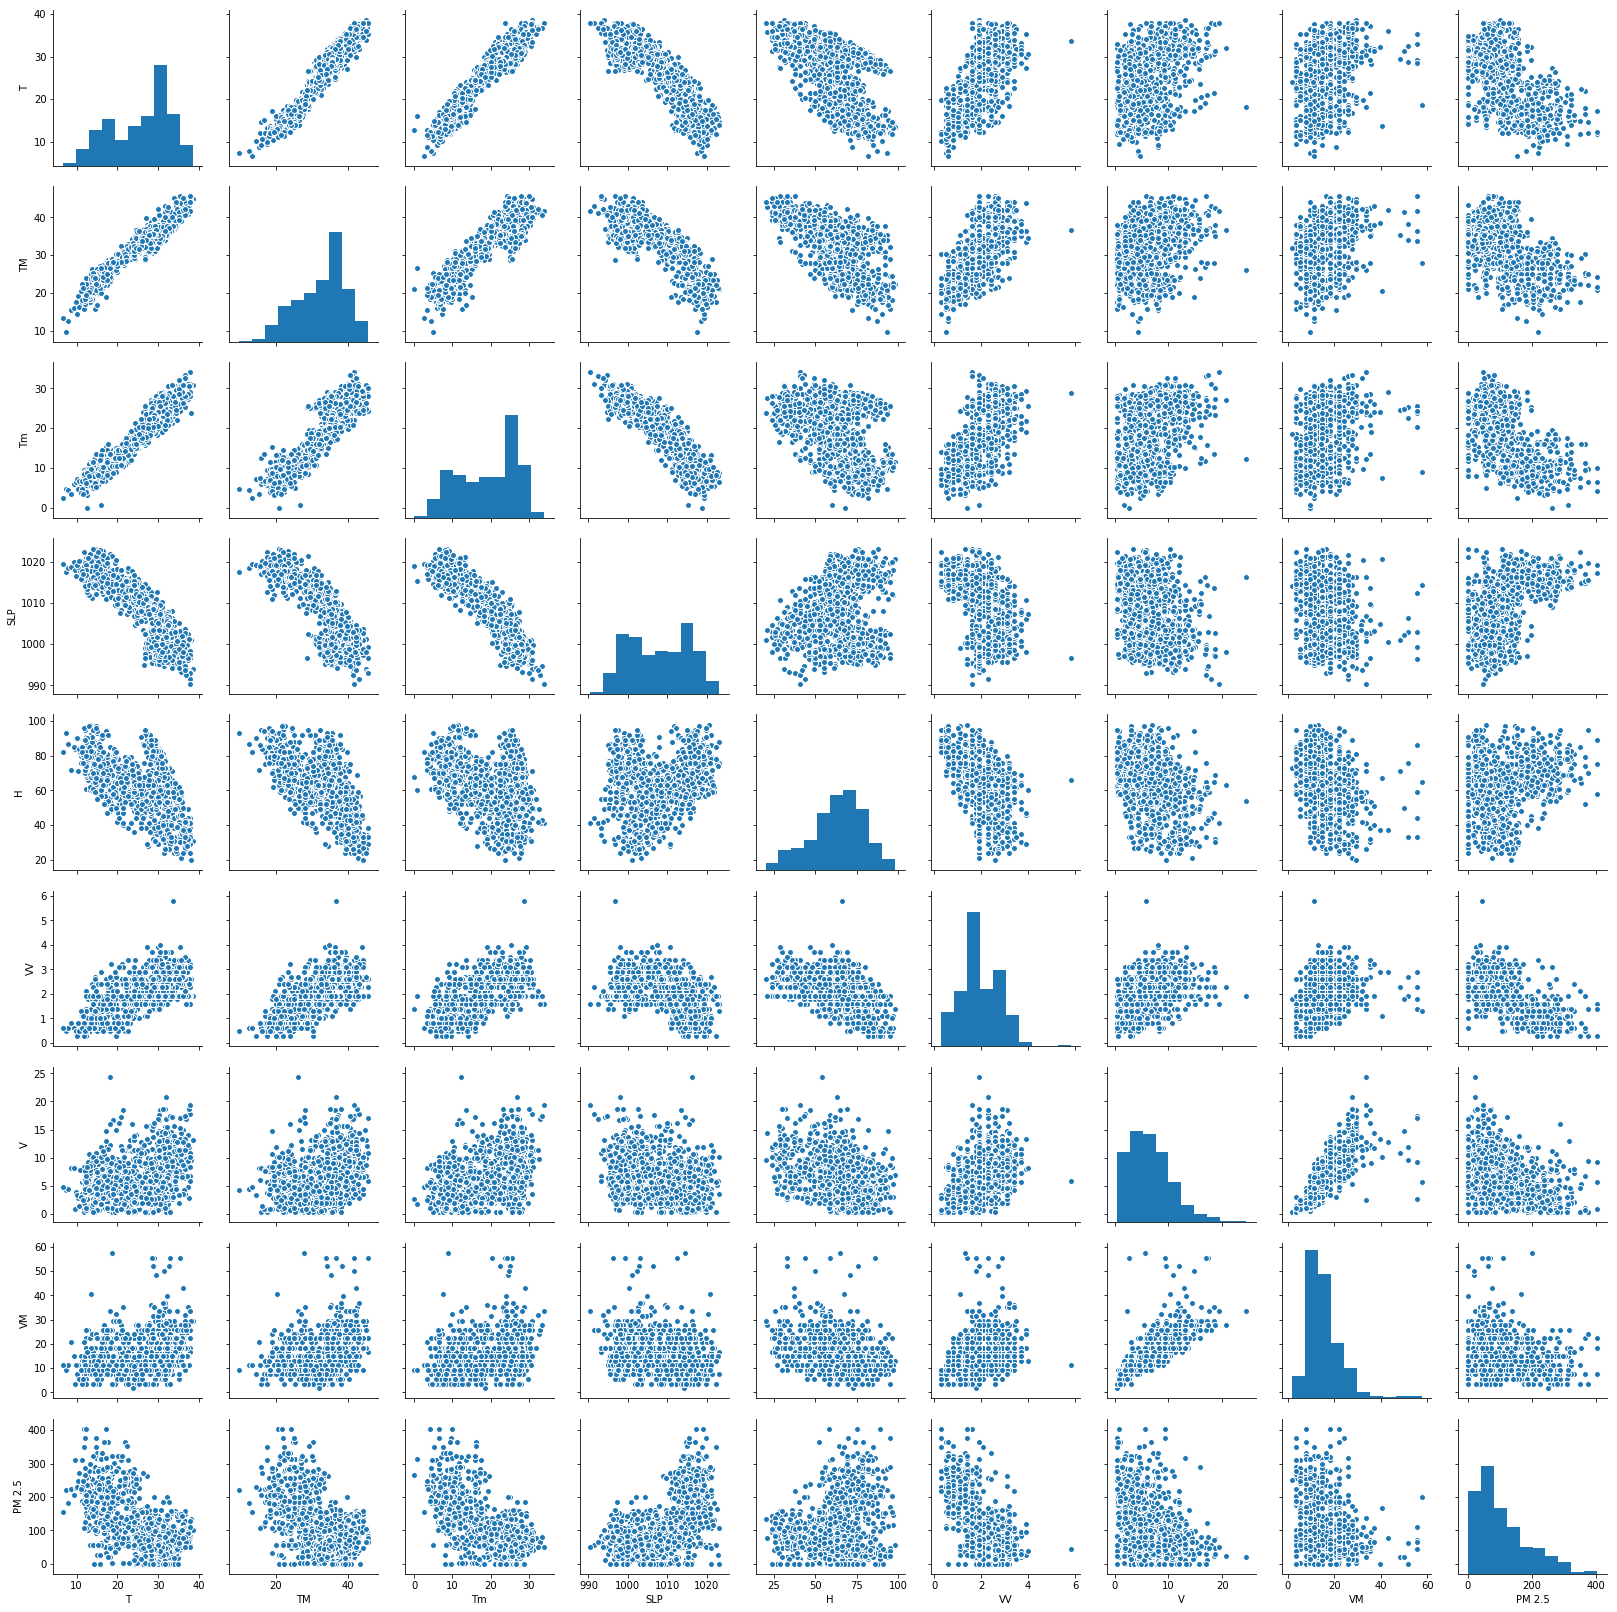

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.963416,0.957227,-0.883207,-0.488919,0.625547,0.320218,0.276548,-0.629693
TM,0.963416,1.000000,0.889979,-0.826008,-0.576799,0.598727,0.303218,0.285671,-0.565459
Tm,0.957227,0.889979,1.000000,-0.912333,-0.275047,0.547490,0.312165,0.244408,-0.661733
SLP,-0.883207,-0.826008,-0.912333,1.000000,0.231971,-0.483494,-0.325862,-0.269129,0.605637
H,-0.488919,-0.576799,-0.275047,0.231971,1.000000,-0.489597,-0.356241,-0.368694,0.166577
VV,0.625547,0.598727,0.547490,-0.483494,-0.489597,1.000000,0.369851,0.325963,-0.593327
V,0.320218,0.303218,0.312165,-0.325862,-0.356241,0.369851,1.000000,0.780952,-0.327917
VM,0.276548,0.285671,0.244408,-0.269129,-0.368694,0.325963,0.780952,1.000000,-0.262848
PM 2.5,-0.629693,-0.565459,-0.661733,0.605637,0.166577,-0.593327,-0.327917,-0.262848,1.000000


# Correlation Matrix Heatmap

Correlation states how the features are related to each other or target value

Correlation can be positive (increase in one value of the feature increases the target variable) 
or negative (increase in one value of the feature decreases the target variables )

Heatmap makes it easy to identify which features are most related to the target variable,
we will plot heatmap of correlated feature using the seaborn library.


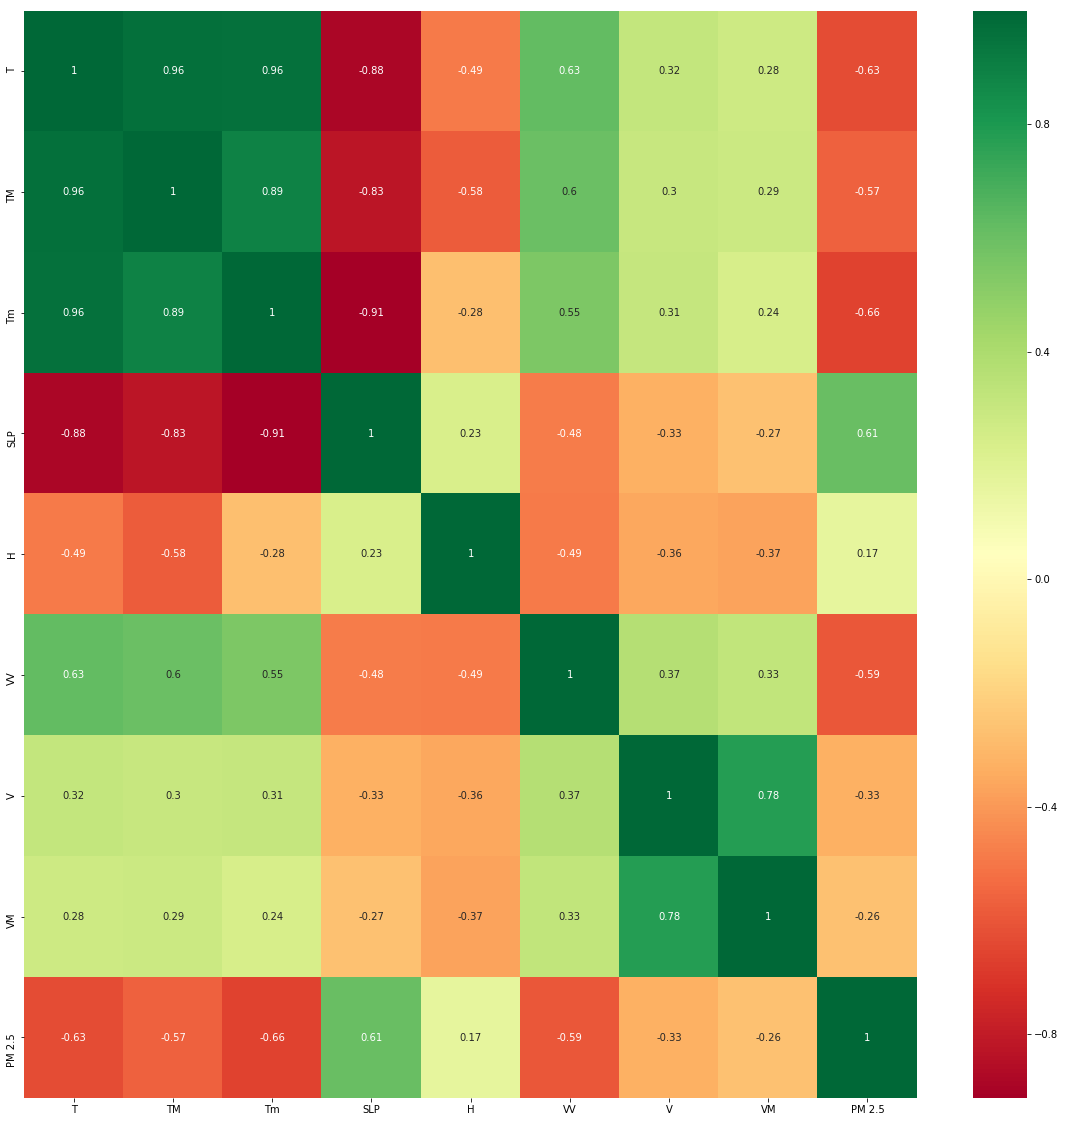

In [10]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#Plot heatmap
g=sns.heatmap(df[top_corr_features].corr(),annot=True, cmap= "RdYlGn")

In [11]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

# Feature Importance

You can get feature importance of each feature of your dataset by using feature important property of the model.

Feature importance gives you a score for each feature of your data, the higher teh score more important or relevant id the
feature towards output variable.

Feature important is inbuilt class that comes with tree based regressor, we will be using Extra Tree regressor for extracting the top 10 features of the dataset.



In [12]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
print(model.feature_importances_)

[0.20403229 0.05304995 0.20321176 0.17720829 0.07081162 0.1862179
 0.05795532 0.04751286]


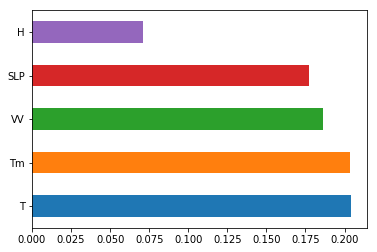

In [14]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


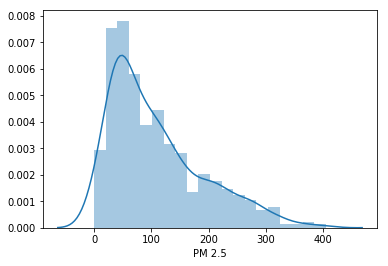

In [15]:
sns.distplot(y)

#it is right skewed

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 0)

In [17]:
X_train.shape, y_train.shape

((761, 8), (761,))

In [18]:
X_test.shape, y_test.shape

((327, 8), (327,))

In [19]:
from sklearn.linear_model import LinearRegression


In [20]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Slope m value where y= mx +c then coefficient is slope(m) with respect to all the independent feature

regressor.coef_

array([  0.73586574,   0.49422152,  -5.78546447,   0.53008447,
        -0.7345896 , -43.45735865,  -1.92997688,   0.08983924])

In [22]:
# intercept where --> all the independent value is Zero

regressor.intercept_

-201.84687008591217

In [23]:
print("Coefficient of determination R^2 on train set :{}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 on train set :0.5558460401426301


In [24]:
print("coefficient of determination R^2 on test set:{}".format(regressor.score(X_test,y_test)))

coefficient of determination R^2 on test set:0.5002132050072754


In [25]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,x,y,cv=5)

In [26]:
score.mean()

0.4962057187240262

# Model Evaluation

In [27]:
coeff_diff = pd.DataFrame(regressor.coef_,x.columns,columns=['coefficient'])

In [28]:
coeff_diff

,coefficient
T,0.735866
TM,0.494222
Tm,-5.785464
SLP,0.530084
H,-0.734590
VV,-43.457359
V,-1.929977
VM,0.089839


# Intepretation of coefficient
     . Holding all the other feature fixed , a one unit in TM  is associated with  an decrease of 5.7 in AQi  PM2.5
     . Holding all the other feature fixed , a one unit in SLP  is associated with  an increase of 0.53 in AQi  PM2.5
     

In [29]:
pred = regressor.predict(X_test)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


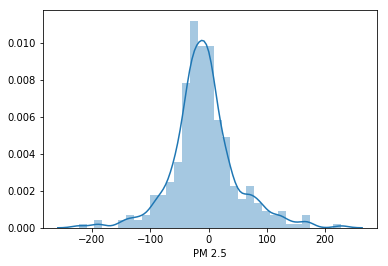

In [30]:
sns.distplot(y_test-pred)

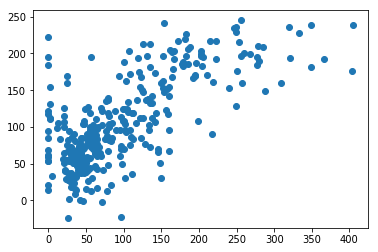

In [31]:
plt.scatter(y_test,pred)

# Regression Evaluation Metrics
## Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [32]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 40.54246531132519
MSE: 3226.014432469144
RMSE: 56.798014335618674


In [33]:
import pickle

In [34]:
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)

# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 

In [36]:
lin_regression = LinearRegression()
mse = cross_val_score(lin_regression,x,y,scoring='neg_mean_squared_error', cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3363.347735049973


# Ridge Regression

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [38]:
ridge = Ridge()
parameters = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge,parameters, scoring='neg_mean_squared_error', cv=5 )
ridge_regressor.fit(x,y)


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [39]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3322.603829768636


# Lasso Regression


In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score 

In [41]:
lasso = Lasso()
parameters = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
Lasso_regressor = GridSearchCV(lasso,parameters, scoring='neg_mean_squared_error', cv=5 )
Lasso_regressor.fit(x,y)


C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very 

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [42]:
print(Lasso_regressor.best_params_)
print(Lasso_regressor.best_score_)

{'alpha': 5}
-3318.6485062272786


# Model Evaluation 

In [43]:
prediction=Lasso_regressor.predict(X_test)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


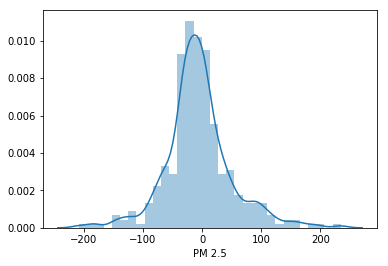

In [44]:
sns.distplot(y_test-prediction)

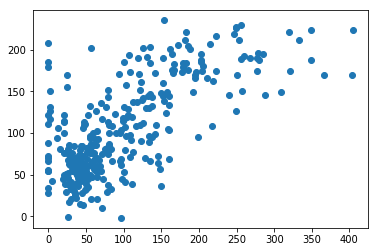

In [45]:
plt.scatter(y_test,prediction)

# Regression Evaluation Metrics¶
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [46]:
from sklearn import metrics


In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction))) 

MAE: 40.520189245309886
MSE: 3264.5684287721583
RMSE: 57.13640195857767


In [48]:

# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(Lasso_regressor, file)

# Decision tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor


In [50]:
dtree= DecisionTreeRegressor(criterion='mse')

In [51]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [52]:
print("coefficient of determining R^2 on train set ::: {}".format(dtree.score(X_train,y_train)))

coefficient of determining R^2 on train set ::: 1.0


In [53]:
print("Coefficient of determining R^2 on test Set ::: {}".format(dtree.score(X_test,y_test)))

Coefficient of determining R^2 on test Set ::: 0.1939730628954245


In [54]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,x,y,cv=5)

In [55]:

score.mean()

0.024733734707915466

# Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [56]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

In [57]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [58]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

KeyError: 'CONDA_PREFIX'

In [60]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

# Model Evaluation

In [62]:

prediction=dtree.predict(X_test)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


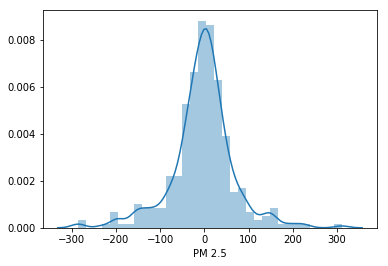

In [63]:
sns.distplot(y_test-prediction)

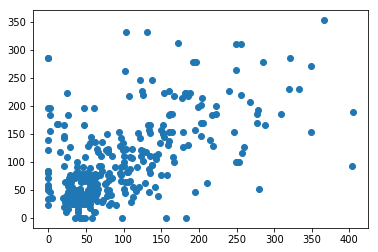

In [64]:
plt.scatter(y_test,prediction)

# Hyperparameter Tuning DEcision Tree Regressor

In [66]:

## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [67]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [68]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [69]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [71]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 2322 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 5906 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 10514 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 16146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 22802 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 30482 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 39186 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 48914 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 59666 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 71442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 84242 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 98066 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  4.6min finished



 Time taken: 0 hours 4 minutes and 35.99 seconds.


In [72]:
random_search.best_params_

{'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [73]:

random_search.best_score_

-3314.486069510451

In [74]:
predictions_tree=random_search.predict(X_test)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


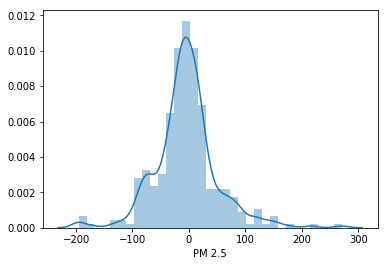

In [76]:
sns.distplot(y_test-predictions_tree)

In [77]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions_tree))
print('MSE:', metrics.mean_squared_error(y_test, predictions_tree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_tree)))

MAE: 38.86587251466326
MSE: 3151.025436913304
RMSE: 56.13399537636087


In [78]:
import pickle

In [79]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)

# RandomForestRegressor

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:

regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [82]:

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.918544867026621
Coefficient of determination R^2 <-- on train set: 0.5255979389729604


In [84]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [85]:
score.mean()

0.45351944408874745

### Model Evaluation RandomForestRegressor

In [86]:
prediction=regressor.predict(X_test)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


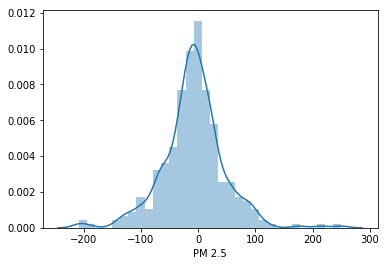

In [87]:

sns.distplot(y_test-prediction)

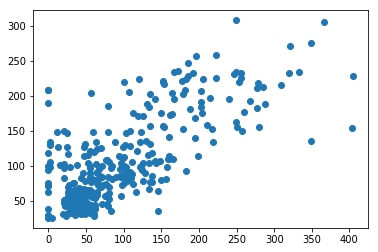

In [88]:
plt.scatter(y_test,prediction)

### Hyperparameter Tuning RandomForestRegressor


In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [94]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [98]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [99]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [100]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   3.3s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   7.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   6.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   6.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   6.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   6.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=   6.8s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.8s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   4.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   3.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   4.4s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   4.1s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   4.5s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.4s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   6.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.3s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   4.1s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.8s
[CV] n_estimators=900, min_samples_split=

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.2s
[CV] n_estimators=100, min_samples

[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=15, total=   1.2s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=1200, min_sample

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   3.1s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   3.5s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=5, total=   3.2s
[CV] n_estimators=500, min_samples_split=5, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   6.8s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   7.5s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   8.5s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=500, min_samples_split=5

[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   7.0s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   9.9s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   6.8s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=5, total=   6.8s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=800, min_samples_spl

[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   4.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   6.3s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   5.8s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   7.2s
[CV] n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, total=   5.6s
[CV] n_estimators=1100, min_samples_split=100, min_s

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 36.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [101]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [102]:

rf_random.best_score_

-2679.077595002577

In [104]:
predictions=rf_random.predict(X_test)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


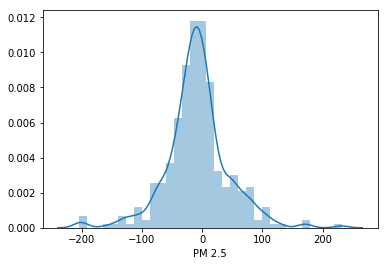

In [105]:

sns.distplot(y_test-predictions)

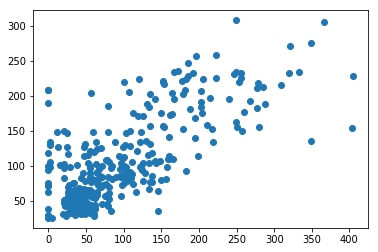

In [106]:
plt.scatter(y_test,prediction)

In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 37.32264221911924
MSE: 2815.524186883636
RMSE: 53.06151323590043


In [108]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

# XgboostRegressor

In [109]:
import xgboost as xgb

In [110]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [112]:

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

score.mean()

Coefficient of determination R^2 <-- on train set: 0.7847497264936635
Coefficient of determination R^2 <-- on train set: 0.5687642721360098


0.5188402954500952

### Model Evaluation

In [113]:
prediction=regressor.predict(X_test)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


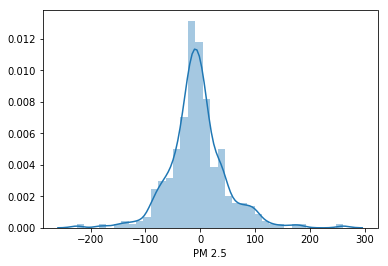

In [114]:

sns.distplot(y_test-prediction)

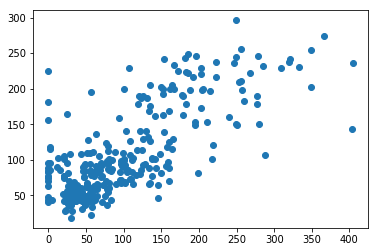

In [115]:
plt.scatter(y_test,prediction)

### Hyperparameter Tuning

In [116]:

xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [117]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [119]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [120]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [121]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [122]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   7.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   3.8s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   7.2s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   5.8s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   6.0s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   6.1s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  su

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   4.5s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   4.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   5.2s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   5.1s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   5.3s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   4.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   3.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   4.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   3.9s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   3.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   3.0s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   4.0s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   4.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   3.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   3.2s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   6.7s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   1.2s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   1.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   1.5s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.6s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  

[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   6.9s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   3.5s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   6.1s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   6.1s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=  18.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[C

[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   8.8s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   7.2s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   1.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   4.3s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   3.1s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   1.8s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   2.7s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   4.3s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_es

[CV]  subsample=0.6, n_estimators=100, min_child_weight=4, max_depth=10, learning_rate=0.05, total=   0.4s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   1.7s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   2.9s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   3.9s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   3.2s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   4.3s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   5.2s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   3.0s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   6.6s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   8.6s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  su

[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   2.8s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   3.0s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   5.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   5.2s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   6.3s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 43.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [123]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 15,
 'learning_rate': '0.05'}

In [124]:
xg_random.best_score_

-2806.2827799301494

In [125]:
predictions=xg_random.predict(X_test)

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


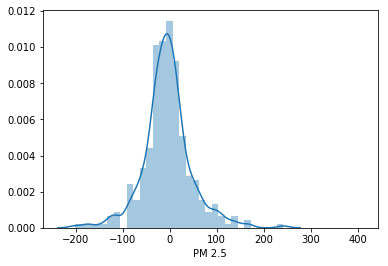

In [126]:

sns.distplot(y_test-predictions)

plt.scatter(y_test,predictions)

In [127]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 36.837725565654665
MSE: 2756.3338985181467
RMSE: 52.500799027425735


In [128]:
import pickle
# open a file, where you ant to store the data
file = open('Xgboost_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)